<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB
None
   Unnamed: 0  Customer_ID  A_1    A_2  

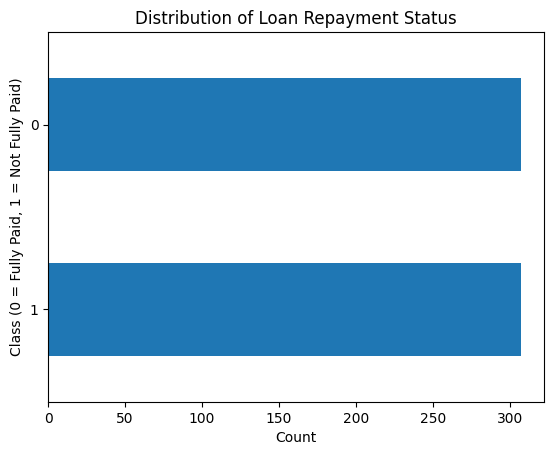

Random Forest Accuracy: 0.8768472906403941
Blended Logistic Regression Accuracy: 0.9014778325123153


In [9]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# Load the CSV file
file_path = '/content/Credit_Card_Fraud_Detection.csv'  # Update this to the correct file path
fraud_data = pd.read_csv(file_path)

# Step 3: Explore the data (Optional)
print(fraud_data.info())
print(fraud_data.head())

# Step 4: Handle Imbalance in the Target Variable (Assuming `class` column indicates fraud status)
fraud_class_1 = fraud_data[fraud_data['class'] == 1]  # Fraud cases
fraud_class_0 = fraud_data[fraud_data['class'] == 0].sample(len(fraud_class_1))  # Non-fraud cases (undersampling)

# Balance the dataset
final_fraud_data = pd.concat([fraud_class_1, fraud_class_0])

# Plot value counts for the class column
print(final_fraud_data['class'].value_counts())
final_fraud_data['class'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Class (0 = Fully Paid, 1 = Not Fully Paid)')
plt.title('Distribution of Loan Repayment Status')
plt.show()

# Step 5: Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))

X = final_fraud_data.drop('class', axis=1)  # Features
y = final_fraud_data['class']  # Target

normalized_X = scaler.fit_transform(X)

# Step 6: Split the data into training and testing sets
r_state = 2023
t_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=t_size, random_state=r_state, stratify=y)

# Step 7: Train a RandomForestClassifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the RandomForest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Step 9: Ensemble Learning (Blending)
# Train Decision Tree and KNN models
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Step 10: Combine Predictions for Logistic Regression
X_test_combined = pd.DataFrame(X_test)  # Original test features
X_test_combined['DT_Pred'] = y_pred_dt  # Decision Tree predictions
X_test_combined['KNN_Pred'] = y_pred_knn  # KNN predictions

# Convert all column names in X_test_combined to strings
X_test_combined.columns = X_test_combined.columns.astype(str)

# Logistic Regression on blended features
lr_model = LogisticRegression()
lr_model.fit(X_test_combined, y_test)

y_pred_lr = lr_model.predict(X_test_combined)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Blended Logistic Regression Accuracy: {accuracy_lr}")
